In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

## Generating Data

In [2]:
X,Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


In [3]:
# X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
# print(X.shape,Y.shape)

In [4]:
plt.style.use("seaborn")

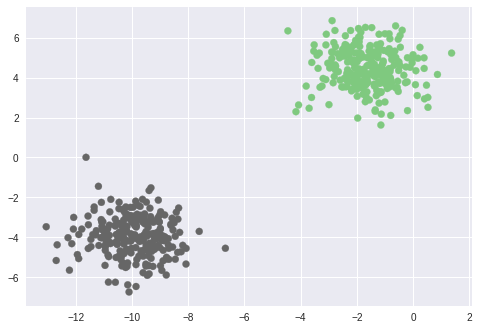

In [5]:
plt.scatter(X[:,0],X[:,1], c=Y, cmap = plt.cm.Accent)
plt.show()

## Model and helper functions

In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

## Implement Perceptron Learning Algorithm
- Learn the Weights
- Reduce the Loss
- Make the Predictions

In [7]:
def predict(X, weights):
    """X -> mx(n+1) matrix, w -->(nX1) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [8]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [9]:
def update(X,Y,weights,learning_rate):
    """Perforn weights updates for 1 epoach"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [10]:
def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    # Modify the input to handel the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Init Weights 0
    weights = np.zeros(X.shape[1]) # (n+1) entries
    
    # Iterate over all epochs and make updates
    
    for epoach in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoach%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoach,l))
            
    return weights

In [11]:
weights = train(X,Y)

Epoch 0 Loss 0.0566
Epoch 10 Loss 0.0110
Epoch 20 Loss 0.0061
Epoch 30 Loss 0.0042
Epoch 40 Loss 0.0033
Epoch 50 Loss 0.0027
Epoch 60 Loss 0.0023
Epoch 70 Loss 0.0020
Epoch 80 Loss 0.0017
Epoch 90 Loss 0.0016
Epoch 100 Loss 0.0014
Epoch 110 Loss 0.0013
Epoch 120 Loss 0.0012
Epoch 130 Loss 0.0012
Epoch 140 Loss 0.0011
Epoch 150 Loss 0.0010
Epoch 160 Loss 0.0010
Epoch 170 Loss 0.0009
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0009
Epoch 200 Loss 0.0008
Epoch 210 Loss 0.0008
Epoch 220 Loss 0.0008
Epoch 230 Loss 0.0008
Epoch 240 Loss 0.0007
Epoch 250 Loss 0.0007
Epoch 260 Loss 0.0007
Epoch 270 Loss 0.0007
Epoch 280 Loss 0.0007
Epoch 290 Loss 0.0007
Epoch 300 Loss 0.0006
Epoch 310 Loss 0.0006
Epoch 320 Loss 0.0006
Epoch 330 Loss 0.0006
Epoch 340 Loss 0.0006
Epoch 350 Loss 0.0006
Epoch 360 Loss 0.0006
Epoch 370 Loss 0.0006
Epoch 380 Loss 0.0006
Epoch 390 Loss 0.0005
Epoch 400 Loss 0.0005
Epoch 410 Loss 0.0005
Epoch 420 Loss 0.0005
Epoch 430 Loss 0.0005
Epoch 440 Loss 0.0005
Epoch 450 Loss 0.0005

## Predictions
- Make predictions
- Visualise Decision Surface
- Linear vs Non-Linear Classification

In [12]:
def getPredictions(X_test,weights,labels=True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=(0.5)] = 1
        return labels

In [13]:
weights

array([-0.41744288, -0.37436288, -2.37467831])

In [18]:
x1 = np.linspace(-15,3,10)
# print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]
# print(x2)

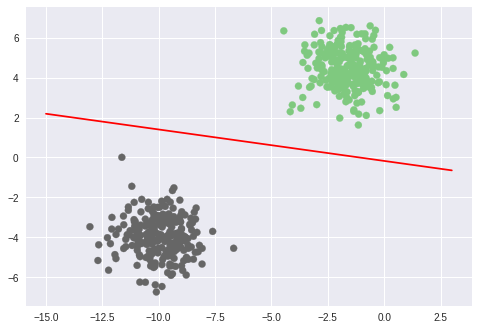

In [19]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [20]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
# print(Y_)
training_acc =np.sum(Y_ == Y)/Y.shape[0]
print(training_acc)

1.0


In [21]:
print(Y_)

[1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.